In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Import feature and tree visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import style


In [3]:
# global variables
start_features = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
target = "Attrition"


In [43]:
def main():
    # create dataframe with project's data set
    df = pd.read_csv('HR.csv')
    
    # clean the data
    clean_df = clean_data(df)

    # create the model
    # takes "decisiontree" or "randomforest" as its second argument
    create_model(clean_df, "decisiontree")
    

In [5]:
def extract_categoricals(df):
    cat_features = []
    
    # extract a list of all categorical features for feature engineering except target column
    for col_header in df.columns:
        if col_header != target and df.dtypes[col_header] == object:
            cat_features.append(col_header)         
    return cat_features
        

In [6]:
def clean_data(df):
    # drop columns that are not needed
    for col_header in df.columns:
        if col_header not in start_features and col_header != target:
            df.drop(col_header, axis=1, inplace=True)
            
    # drop rows that contain at least one empty cell
    df.dropna(axis='rows', thresh=1)
    
    # feature enigneering for categorical data
    clean_df = pd.get_dummies(data=df, columns=extract_categoricals(df))
    
    return clean_df


In [41]:
def feature_selection(clean_df):
    
    # get target variable data and exclude it from the features
    y = clean_df.pop(target)
      
    # get new feature list
    features = clean_df.columns.tolist()
    
    # get feature data
    X = clean_df[features] # Features Matrix
    
    return X, y


In [45]:
def create_model(clean_df, string):
    # get features matrix X and target variable y
    X, y = feature_selection(clean_df)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  
    # possible imbalance adjustment
    X_test, y_test = data_oversampling(X_test, y_test)
    
    if string == "decisiontree":
        # Create Decision Tree classifer object
        # use criterion=entropy as attribute or default gini
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
    elif string == "randomforest":
        # Create random forest object
        # use criterion=entropy as attribute or default gini
        clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=200)
    else:
        print("wrong input for create_model function.")
        return

    # Train the model Classifer
    clf = clf.fit(X_train,y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # print model accuracy to terminal
    model_accuracy(y_test, y_pred)
    
    # plot tree if applicable
    if string == "decisiontree":
        plot_tree(clf, X.columns.tolist())
    
    return 

In [9]:
def plot_tree(clf, features):
    
    # Setting dpi = 300 to make image clearer than default
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,30), dpi=300)

    tree.plot_tree(clf,
           feature_names=features,
           class_names=["No","Yes"],
           filled=True,
           fontsize=15);

    fig.savefig('tree.png')


In [10]:
def model_accuracy(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [11]:
def plot_imbalance():
    # visualize imbalance of Attrition data
    print(y.value_counts())
    pass
  

In [12]:
def plot_feature_importance():
    # visualize feature importance based on spefici metric
    pass

In [42]:
def data_oversampling(X, y):
    # https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data/notebook
    #adjust target data imbalance by over/undersampling
    rus = RandomOverSampler(random_state=0)
    rus.fit(X, y)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled
    

Accuracy: 0.7202702702702702
[[264  82]
 [125 269]]
              precision    recall  f1-score   support

          No       0.68      0.76      0.72       346
         Yes       0.77      0.68      0.72       394

    accuracy                           0.72       740
   macro avg       0.72      0.72      0.72       740
weighted avg       0.73      0.72      0.72       740



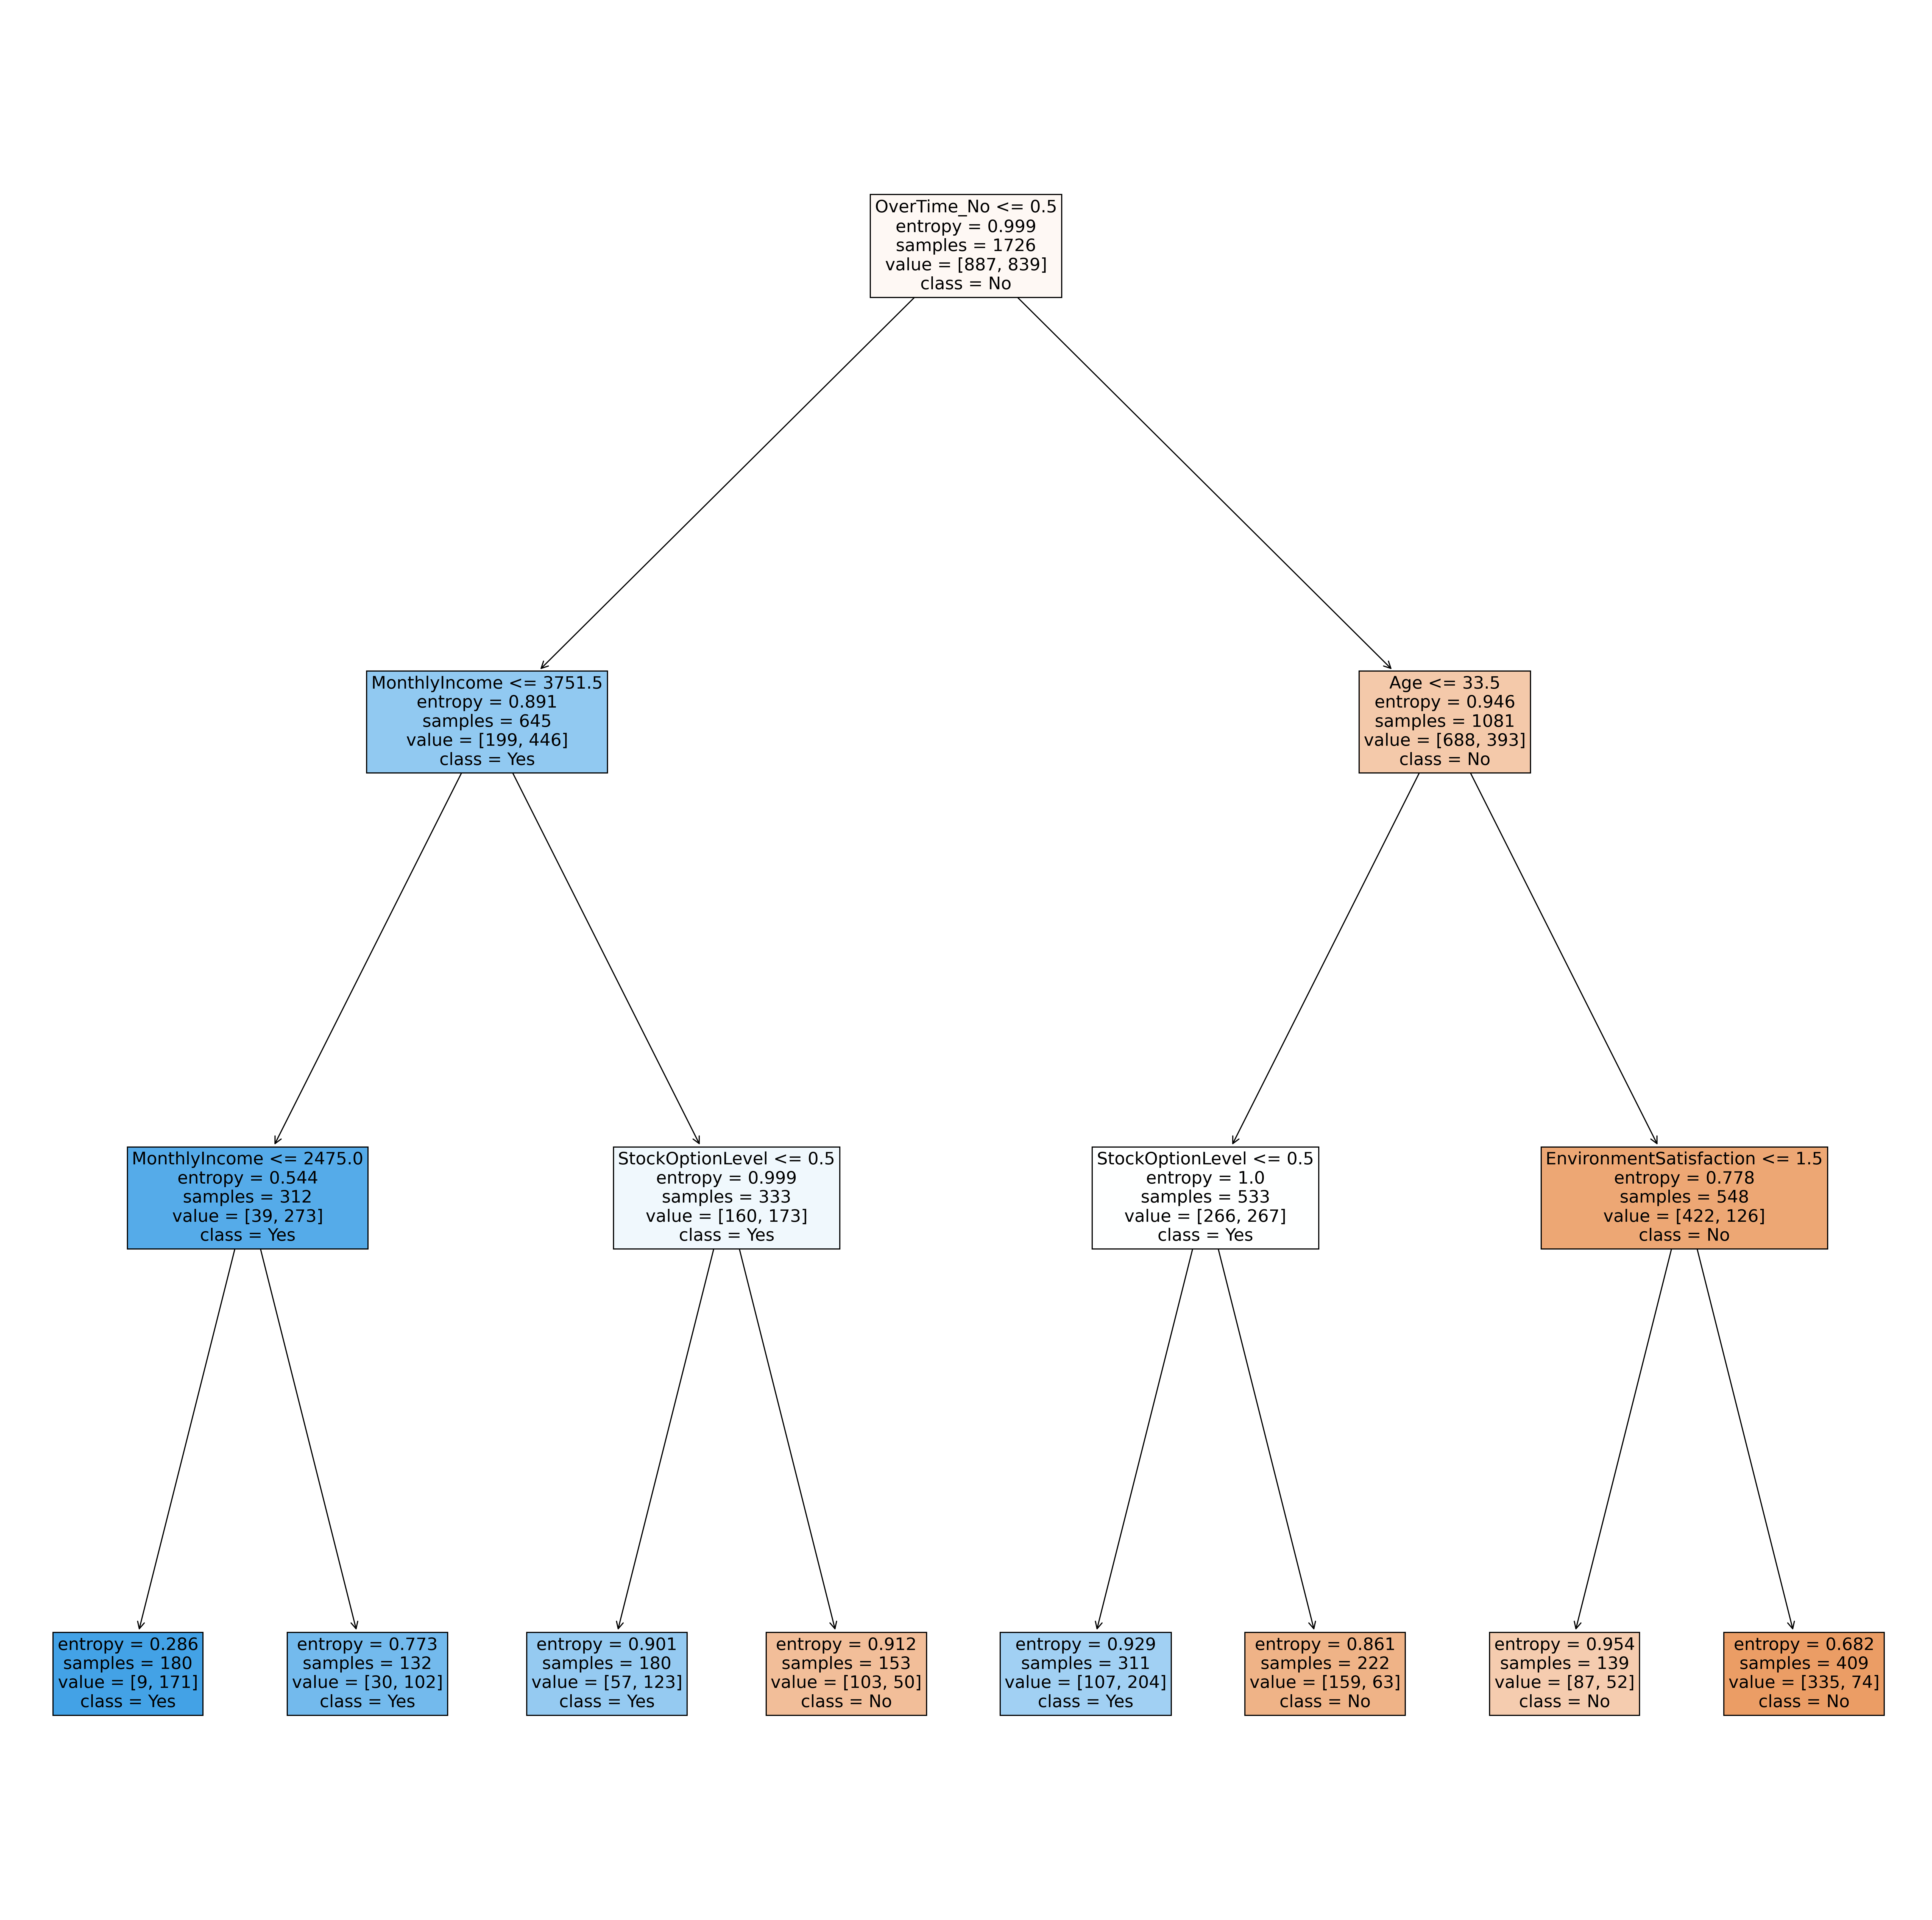

In [44]:
# test
if __name__ == '__main__':
    main()
    